In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

def accuracy(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        accuracy: float as percent; rounded to two decimal points
    """

    correct = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            correct += 1

    total = len(pred)
    return (correct/total)*100
    


x = np.array([1,2,1,4,1,0, 2,2,3,4])
y = np.array([0,0,1,1,1,1,3,2,2,4])

# print(accuracy(x,y)) # 40.0

result = accuracy(x, y)
rounded_result = round(result, 2)
print(rounded_result)

x = np.array(['A','A','B','A', 'C', 'A', 'A', 'C', 'D', 'D', 'C'])
y = np.array(['A','B','A','C', 'B', 'D', 'B', 'D', 'C', 'D', 'C'])

# print(accuracy(x,y)) # 27.27

result = accuracy(x, y)
rounded_result = round(result, 2)
print(rounded_result)

40.0
27.27


In [ ]:
import numpy as np

def precision(pred, true):
    unique_classes = np.unique(np.concatenate([pred, true]))
    precision_scores = []

    for cls in unique_classes:
        TP = np.sum((pred == cls) & (true == cls))
        FP = np.sum((pred == cls) & (true != cls))

        if TP + FP > 0:
            precision_cls = TP / (TP + FP)
            precision_scores.append(precision_cls)
        else:
            precision_scores.append(0)

    macro_avg_precision = np.mean(precision_scores) * 100
    return round(macro_avg_precision, 2)


x = np.array([1,2,1,4,1,0, 2,2,3,4])
y = np.array([0,0,1,1,1,1,3,2,2,4])
print(precision(x, y))  

x = np.array(['A','A','B','A', 'C', 'A', 'A', 'C', 'D', 'D', 'C'])
y = np.array(['A','B','A','C', 'B', 'D', 'B', 'D', 'C', 'D', 'C'])
print(precision(x, y))  



30.0
25.83


In [ ]:
import numpy as np

def recall(pred, true):
    unique_classes = np.unique(true)  
    recall_scores = []

    for cls in unique_classes:
        TP = np.sum((pred == cls) & (true == cls))
        FN = np.sum((pred != cls) & (true == cls))

        if TP + FN > 0:
            recall_cls = TP / (TP + FN)
            recall_scores.append(recall_cls)
        else:
            recall_scores.append(0)

    macro_avg_recall = np.mean(recall_scores) * 100
    return round(macro_avg_recall, 2)


x = np.array([1,2,1,4,1,0, 2,2,3,4])
y = np.array([0,0,1,1,1,1,3,2,2,4])

print(recall(x, y))


x = np.array(['A','A','B','A', 'C', 'A', 'A', 'C', 'D', 'D', 'C'])
y = np.array(['A','B','A','C', 'B', 'D', 'B', 'D', 'C', 'D', 'C'])

print(recall(x, y))




40.0
29.17


## Part 2: Implement k-fold cross validation

In [ ]:
def run_fold(df, model_instance, fold, x_cols, y_col):
    """
    Input: 
        df: DataFrame; data from all folds
        model_instance: initialized model; to train then evaluate
        fold: int; the fold which we are evaluating on
        x_cols: list; column names of input features
        y_col: string; column name for output label
        
    Output:
        metrics: dict; key-value pairs for macro-average accuracy, precision, recall on the fold
    """
    train = df[df['fold'] != fold]
    val = df[df['fold'] == fold]
    # test_df = df[df['fold'] == fold]
    X_train, y_train = train[x_cols], train[y_col]
    # X_test, y_test = test_df[x_cols], test_df[y_col]
    X_val, y_val = val[x_cols], val[y_cols]
    # print(X_val)
    model_instance.fit(X_train, y_train)
    predictions = model_instance.predict(X_val)
    trueLabel = y_val.to_numpy()
    
    metrics = {
        'accuracy': accuracy(predictions, trueLabel),
        'precision': precision(predictions, trueLabel),
        'recall': recall(predictions, trueLabel)
    }

    return metrics



In [ ]:
from sklearn.model_selection import KFold

def kfold_crossval(df, model, x_cols, y_col):
    """
    Input: 
        df: DataFrame; data from all folds
        model: initialized model
        x_cols: list; column names of input features
        y_col: string; column name for output label
        
    Output:
        metrics: DataFrame; accuracy, precision, recall for each fold
    """
    
    # Initialize the dictionary to store metrics for each fold
    fold_metrics = {'accuracy':[], 'precision':[], 'recall':[]}
    
    # Determine the number of unique folds
    num_folds = len(df['fold'].unique())
    
    # Perform k-fold cross-validation
    for fold_index in range(num_folds):
        fold_keyPair_dict = run_fold(df, model, fold_index+1, x_cols, y_col)
        fold_metrics['accuracy'].append(fold_keyPair_dict['accuracy'])
        fold_metrics['precision'].append(fold_keyPair_dict['precision'])
        fold_metrics['recall'].append(fold_keyPair_dict['recall'])

    metrics_df = pd.DataFrame(fold_metrics)
    
    return metrics_df






        

## Part 3: Process data

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

### Divide the data into train and test

Load in the data and use the `split` column to divide the data into train and test splits. 

In [ ]:
df = pd.read_csv('iris.csv')
## Print out the columns in the data
print(df.shape)
print(df.columns)

train_df = df[df['split'] == 'train']
test_df = df[df['split'] == 'test']
print(train_df.head(10))



(150, 7)
Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species', 'split'],
      dtype='object')
    Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
1            2           4.9          3.0           1.4          0.2  setosa   
2            3           4.7          3.2           1.3          0.2  setosa   
3            4           4.6          3.1           1.5          0.2  setosa   
4            5           5.0          3.6           1.4          0.2  setosa   
5            6           5.4          3.9           1.7          0.4  setosa   
7            8           5.0          3.4           1.5          0.2  setosa   
8            9           4.4          2.9           1.4          0.2  setosa   
9           10           4.9          3.1           1.5          0.1  setosa   
10          11           5.4          3.7           1.5          0.2  setosa   
11          12           4.8          3.4           1.6   

### Add folds to the training data

Add a column `fold`. For some row `x` if fold is `m`, then `x` occurs in the validation set for the `m`-th fold. 

In [ ]:
import numpy as np
import pandas as pd


num_folds = 10
train_df = train_df.sample(frac=1,  random_state=42).reset_index(drop=True)

folds = np.tile(np.arange(1,num_folds+1),train_df.shape[0]//num_folds)
train_df['fold'] = folds

# print(np.arange(len(train_df)) % num_folds)
# print(train_df['fold'])
# print(train_df)




## Part 4: Data exploration and Hypothesis generation 

Explore the dataset and generate hypotheses about which features are likely to be useful in predicting the Iris species

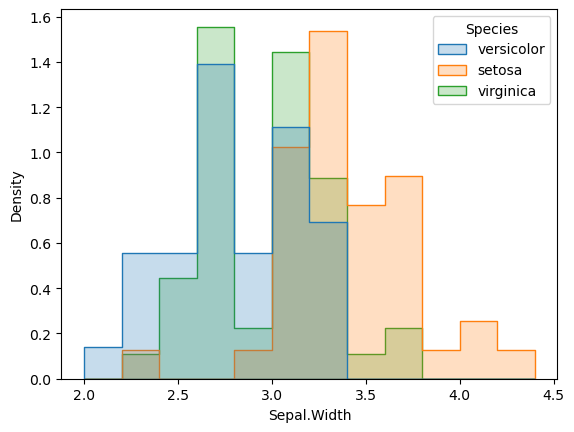

In [ ]:
explore1 = sns.histplot(data = train_df, x='Sepal.Width', hue = 'Species', element="step",
    stat="density", common_norm=False,)



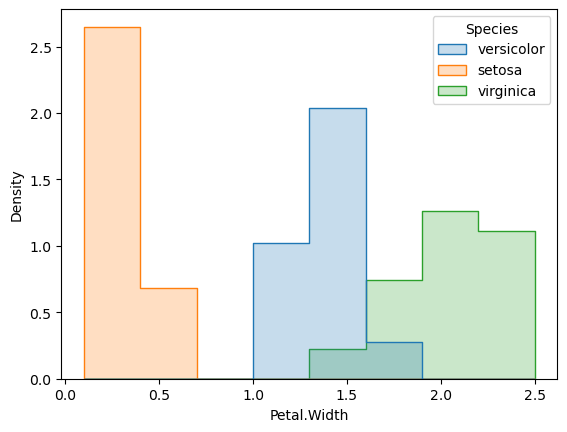

In [ ]:
explore2 = sns.histplot(data = train_df, x='Petal.Width', hue = 'Species', element="step",
    stat="density", common_norm=False,)



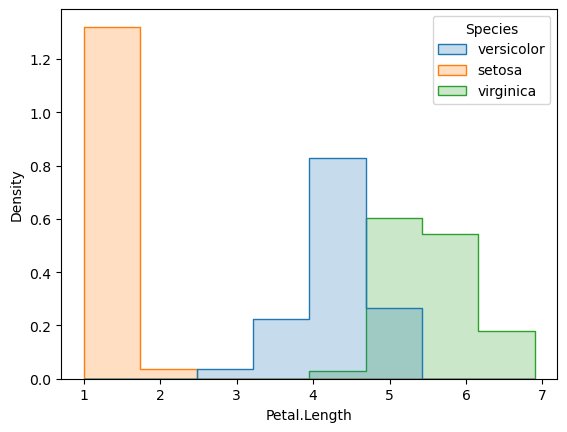

In [ ]:
explore3 = sns.histplot(data = train_df, x='Petal.Length', hue = 'Species', element="step",
    stat="density", common_norm=False,)



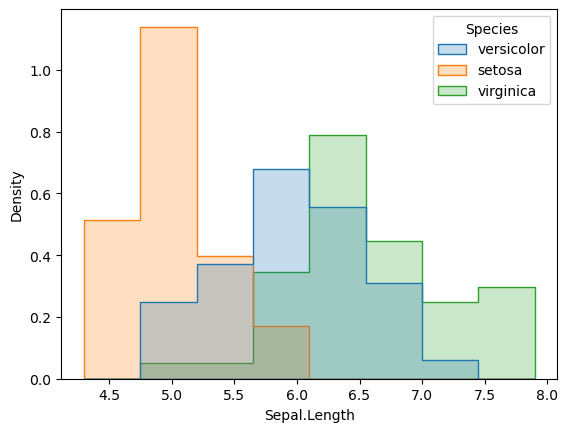

In [ ]:
explore4 = sns.histplot(data = train_df, x='Sepal.Length', hue = 'Species', element="step",
    stat="density", common_norm=False,)



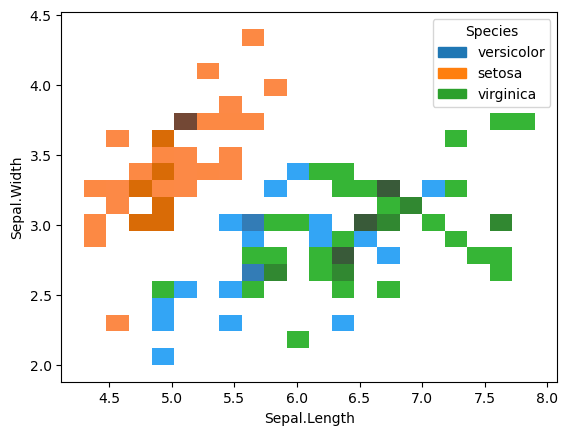

In [ ]:
explore4 = sns.histplot(data = train_df, x='Sepal.Length',y = 'Sepal.Width', hue = 'Species', element="step",
    stat="density", common_norm=False, bins=20)



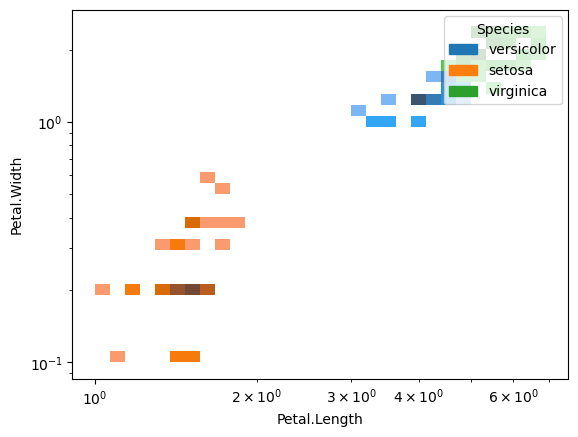

In [ ]:
explore4 = sns.histplot(data = train_df, x='Petal.Length',y = 'Petal.Width', log_scale=True, hue = 'Species', bins = 30)



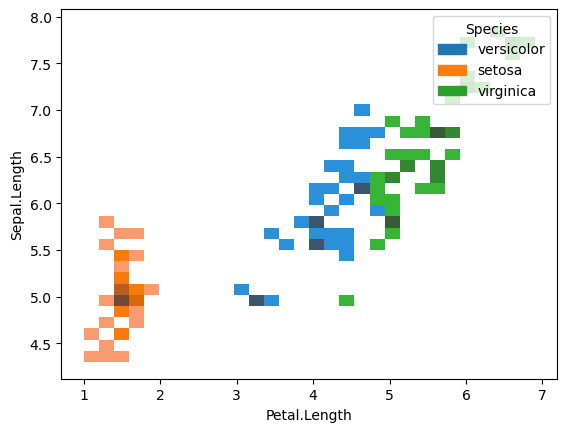

In [ ]:
explore5 = sns.histplot(data = train_df, x='Petal.Length',y = 'Sepal.Length', hue = 'Species', element="step",
    stat="density", common_norm=False, bins = 30)



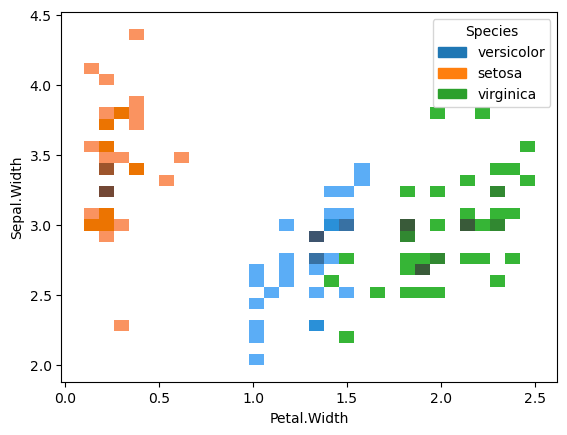

In [ ]:
explore5 = sns.histplot(data = train_df, x='Petal.Width',y = 'Sepal.Width', hue = 'Species', element="step",
    stat="density", common_norm=False,bins = 30)



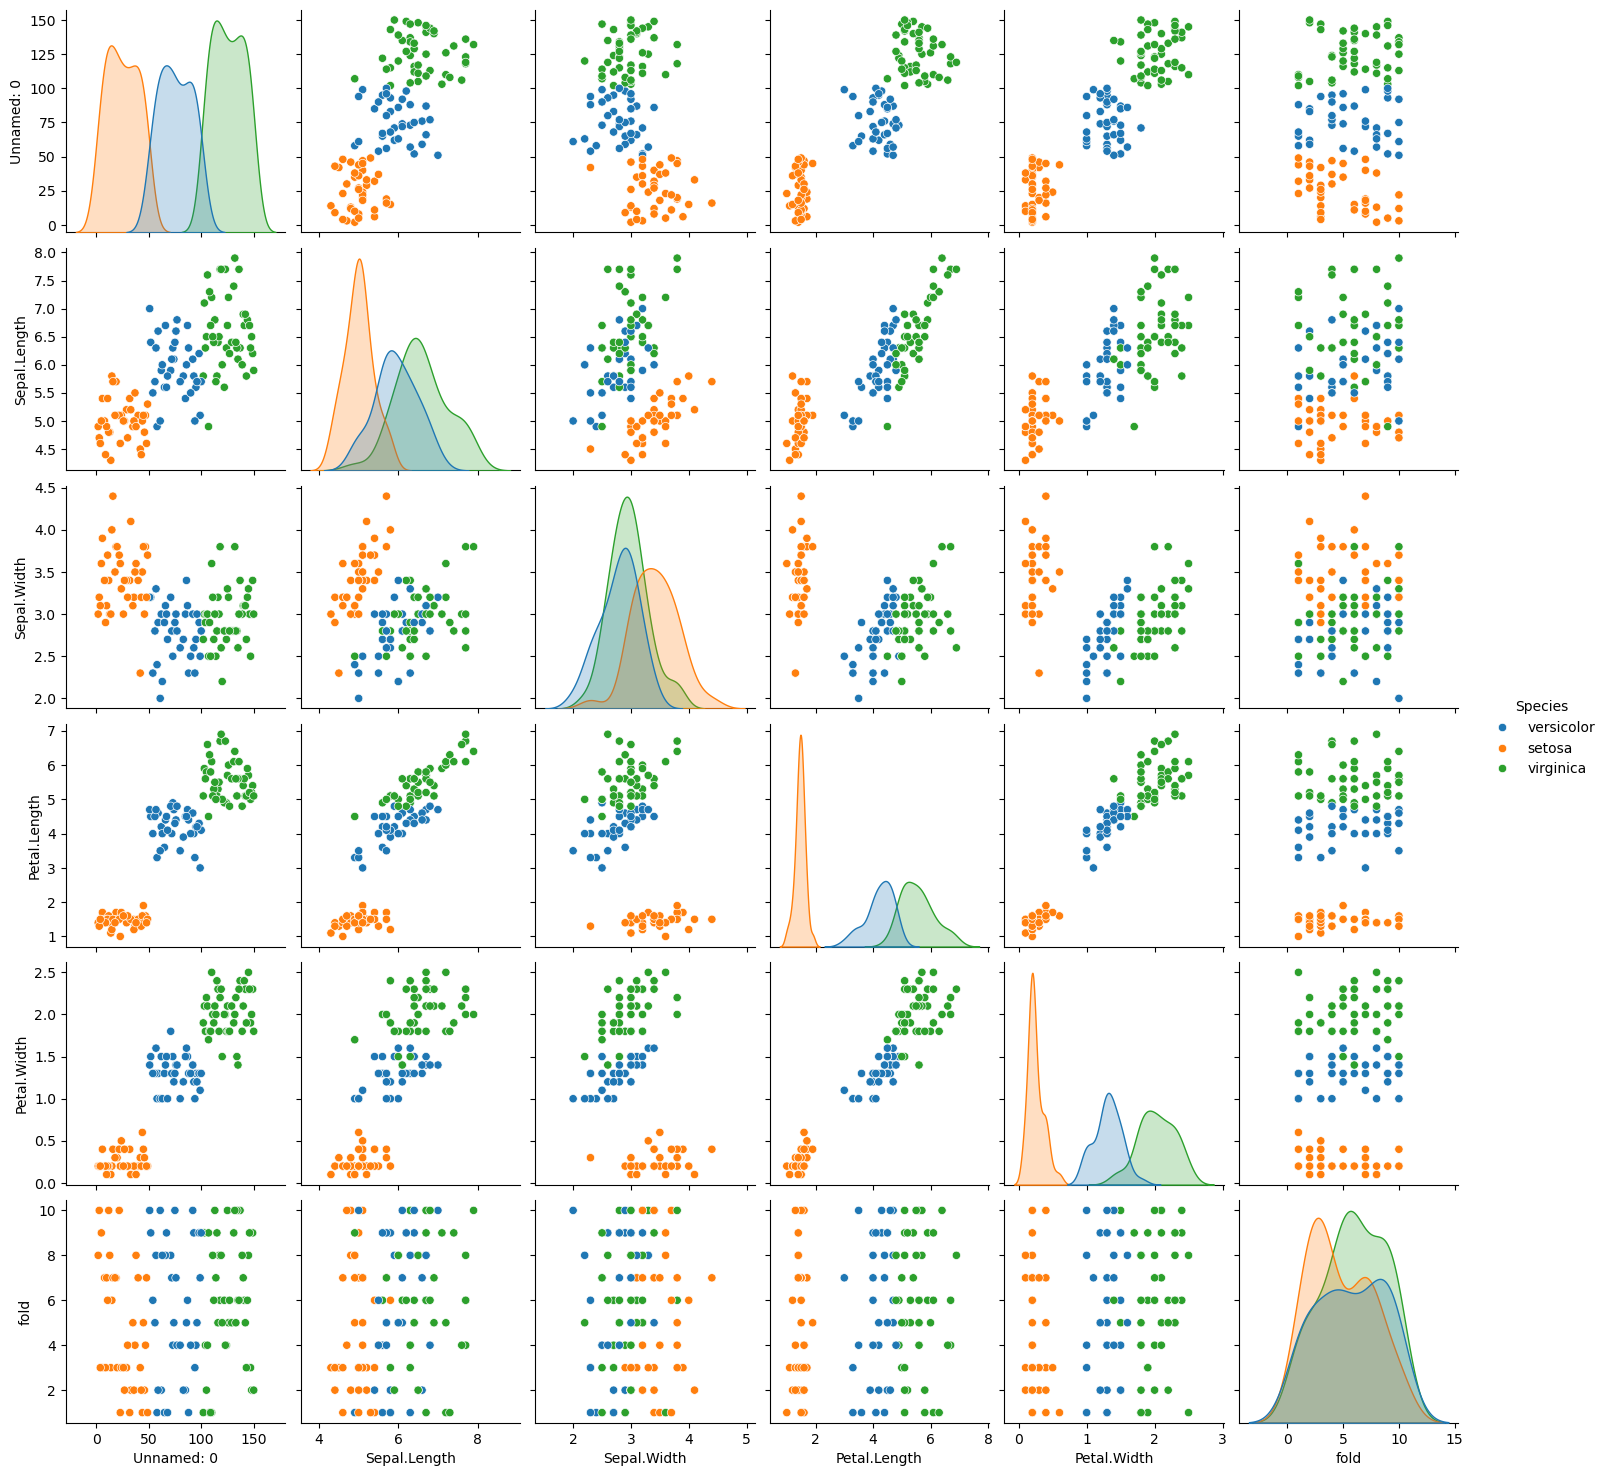

In [ ]:
sns.pairplot(data = train_df,hue = 'Species')
plt.show()


#### **WRITE YOUR HYPOTHESES HERE**



Exploring the data and forming hypotheses helped me understand the data better. It gave me insights into how different features are related to the labeled data, and I even discovered some unexpected patterns and connections. This exploration was crucial for making informed decisions when selecting a model. After exploring, I found that Petal.Length and Petal.Width are particularly useful for predicting the 'Species' label.

## Part 5: Model selection

Based on your generaeted hypotheses, select at least three models to try out. For each of these models, compute:
1. The average precision, recall and accuracy across all folds.
2. The minimum precision, recall and accuracy across all folds.
3. The maximum precision, recall and accuracy across all folds.

Print these in a way that is concise and clear. It might be helpful for you to write a function that generates this summary directly from the output of `kfold_crossval`

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


x_cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length']
y_cols = "Species"
model = LogisticRegression()
metrics_df = kfold_crossval(train_df, model, x_cols, y_cols)
metrics_df.describe()





,accuracy,precision,recall
count,10.000000,10.000000,10.00000
mean,96.666667,97.110000,97.52700
std,4.303315,4.030815,3.35034
min,91.666667,88.890000,91.67000
25%,91.666667,94.440000,94.78750
50%,100.000000,100.000000,100.00000
75%,100.000000,100.000000,100.00000
max,100.000000,100.000000,100.00000


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_cols = ['Petal.Length', 'Petal.Width']
y_cols = "Species"
model = LogisticRegression()
metrics_df = kfold_crossval(train_df, model, x_cols, y_cols)
metrics_df.describe()






,accuracy,precision,recall
count,10.000000,10.000000,10.000000
mean,98.333333,98.888000,98.611000
std,3.513642,2.344302,3.000172
min,91.666667,94.440000,91.670000
25%,100.000000,100.000000,100.000000
50%,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_cols = ['Petal.Length', 'Sepal.Width']
y_cols = "Species"
model = LogisticRegression()
metrics_df = kfold_crossval(train_df, model, x_cols, y_cols)
metrics_df.describe()






,accuracy,precision,recall
count,10.000000,10.000000,10.000000
mean,96.666667,97.222000,97.694000
std,5.826716,4.721169,4.381971
min,83.333333,88.890000,86.670000
25%,93.750000,95.830000,96.872500
50%,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_cols = ['Sepal.Length', 'Petal.Width']
y_cols = "Species"
model = LogisticRegression()
metrics_df = kfold_crossval(train_df, model, x_cols, y_cols)
metrics_df.describe()






,accuracy,precision,recall
count,10.000000,10.000000,10.000000
mean,94.166667,95.380000,95.304000
std,5.624571,4.281729,5.275295
min,83.333333,88.890000,83.330000
25%,91.666667,93.330000,93.607500
50%,91.666667,93.885000,95.135000
75%,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000


## Part 6: Evaluate your final model

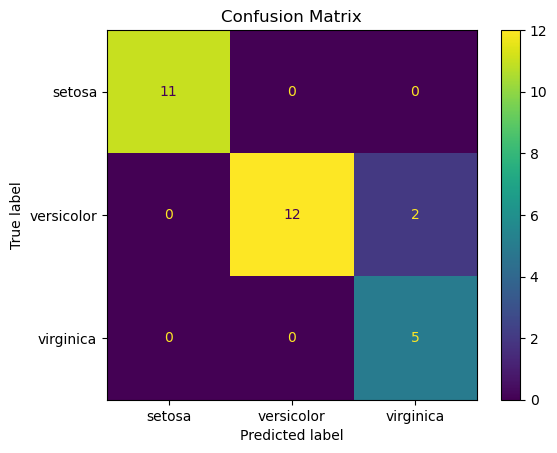

Accuracy Score: 93.33 
Recall Score: 95.24 
Precision Score: 90.48 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

x_cols = ['Petal.Length', 'Petal.Width']

X_train = train_df[x_cols]
y_train = train_df['Species']
X_test = test_df[x_cols]
y_test = test_df['Species']


modelF = LogisticRegression()

modelF.fit(X_train, y_train)

y_pred = modelF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

y_test = y_test.to_numpy()


accuracy_score = accuracy(y_pred, y_test)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_test)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_test)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )




### Conclusion/ Reflection

1. Was the performance of the final model surprising? Why or why not? 
2. Would you want to change anything about the k-fold cross validation model selection process? 

1) Upon reflecting on my final model's performance, I found that the results were slightly lower than the k-fold cross-validation predictions, but this wasn't entirely unexpected. During the exploratory data analysis (EDA) 
and visualization phases, I gained a deep understanding of the data, which laid a solid foundation for anticipating the model's performance. However, the slight decrease in the final metrics - 93.33% accuracy, 95.24% 
recall, and 90.48% precision - compared to the cross-validation means of 98.33% accuracy, 98.61% recall, and 98.88% precision served as a reminder of the complexities inherent in predictive modeling.

2) One thing I would like to change about the k-fold cross-validation model selection process is to have a method to determine if each fold accurately represents the whole dataset. This would prevent situations where the folds are not representative of the overall dataset, leading to biased results.